# Chapter 9: Linear dynamical systems

## 9.1 Linear dynamical systems 

Simulate a time-invariant linear dynamic system 
\begin{align}
x_{t+1} = Ax_t, &\space\space\space t = 1,\dots,T,
\end{align}
with dynamics matrix
\begin{align}
A &= \begin{bmatrix}
\mathbin{\phantom{-}}0.97 & \mathbin{\phantom{-}}0.10 & -0.05 \\
-0.30 & \mathbin{\phantom{-}}0.99 & \mathbin{\phantom{-}}0.05 \\
\mathbin{\phantom{-}}0.01 & -0.04 & \mathbin{\phantom{-}}0.96 
\end{bmatrix}
\end{align}

and initial state $x_1 = (1,0,-1)$.

In [37]:
# setup
x_1 = [1,0,-1]; # initial state 
n = length(x_1); 
T = 50;
A =  [ 0.97  0.10 -0.05 ;
      -0.30  0.99  0.05 ; 
       0.01 -0.04  0.96 ]

state_traj = [x_1 zeros(n, T-1)]; # n x T matrix storing all the states x_t at each time t from 1 to T 

In [38]:
# dynamics recursion
for t=1:T-1
    state_traj[:, t+1] = A*state_traj[:, t]; # x_t+1 = A * x_t
end

In [39]:
#import Pkg; Pkg.add("Markdown")

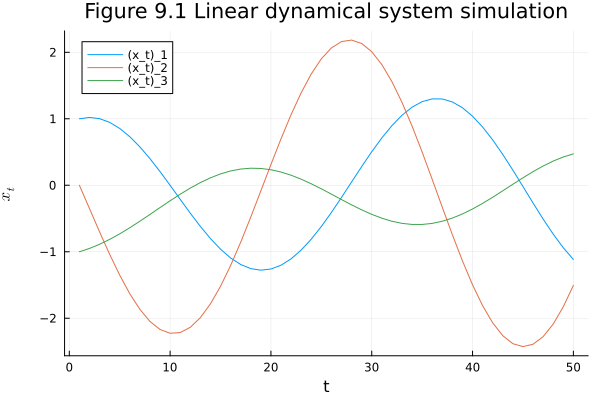

In [47]:
using Plots 
using Markdown
plot(1:T, state_traj', xlabel="t", ylabel=md"\$x_t\$",
     label=["(x_t)_1" "(x_t)_2" "(x_t)_3"], title="Figure 9.1 Linear dynamical system simulation")

## 9.2 Population dynamics 

In [48]:
# import population (initial state in 2010), birth rate, death rate from VMLS (2010 census)
using VMLS
using LinearAlgebra
D = population_data();
b = D["birth_rate"];
d = D["death_rate"];
x = D["population"];
n = length(d);

# creating A - dynamics matrix (nxn - in this case 100x100)
# first row is the birth rate vector 
# diagm(1 .- d[1:end-1]) gives a (n-1)x(n-1) diagonal matrix with diagonal values 1-d_i
# for the last n-1 rows, block matrix of diagonal matrix + one extra zeros column to fit n columns 
A = [b';
     diagm(1 .- d[1:end-1]) zeros(n-1)]

100×100 Matrix{Float64}:
 0.0      0.0      0.0      0.0     0.0      …  0.0      0.0      0.0     0.0
 0.99377  0.0      0.0      0.0     0.0         0.0      0.0      0.0     0.0
 0.0      0.99956  0.0      0.0     0.0         0.0      0.0      0.0     0.0
 0.0      0.0      0.99973  0.0     0.0         0.0      0.0      0.0     0.0
 0.0      0.0      0.0      0.9998  0.0         0.0      0.0      0.0     0.0
 0.0      0.0      0.0      0.0     0.99984  …  0.0      0.0      0.0     0.0
 0.0      0.0      0.0      0.0     0.0         0.0      0.0      0.0     0.0
 0.0      0.0      0.0      0.0     0.0         0.0      0.0      0.0     0.0
 0.0      0.0      0.0      0.0     0.0         0.0      0.0      0.0     0.0
 0.0      0.0      0.0      0.0     0.0         0.0      0.0      0.0     0.0
 ⋮                                           ⋱                            
 0.0      0.0      0.0      0.0     0.0         0.0      0.0      0.0     0.0
 0.0      0.0      0.0      0.0     0.0   

In [49]:
# simulate dynamics recursion for 10 years until 2020
for k=1:10
    x = A*x;
end

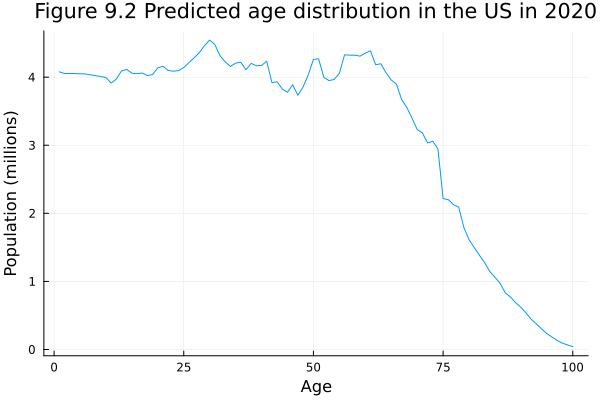

In [50]:
using Plots 
plot(x, legend=false, xlabel="Age", ylabel="Population (millions)", title="Figure 9.2 Predicted age distribution in the US in 2020")

## 9.3 Epidemic dynamics 

**Problem setup:** The model assumes the following happens over each day.
- 5% of the susceptible population will acquire the disease. (The other 95% will remain susceptible)
- 1% of the infected population will die from the diease, 10% will recover and acquire immunity, and 4% will recover and not acquire immunity (and therefore, become susceptible). The remaining 85% will remain infected.
- Those who have recovered with immunity and those who have died remain in those states 

In [51]:
# setup model
T = 210; # number of days of epidemic 
A = [ 0.95 0.04 0 0 ; 
      0.05 0.85 0 0 ;
      0    0.10 1 0 ; 
      0    0.01 0 1 ];
x_1 = [1,0,0,0]; # initial state starts off as all susceptible 
state_traj = [x_1 zeros(length(x_1), T-1)]; 

In [52]:
# dynamics recursion 
for t=1:T-1
    state_traj[:,t+1] = A*state_traj[:,t];
end

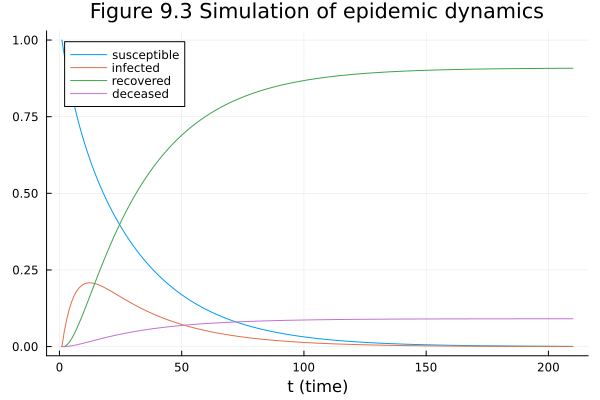

In [54]:
using Plots 
plot(1:T, state_traj', xlabel="t (time)", label=["susceptible" "infected" "recovered" "deceased"],
     title="Figure 9.3 Simulation of epidemic dynamics")

## 9.4 Motion of a mass 

Simulate the discretized model of the motion of a mass (e.g. an airplane, building during an earthquake, etc)

Using the example of 1D movement (movement along a straight line) of a mass with an external force and a drag force from the surface: 


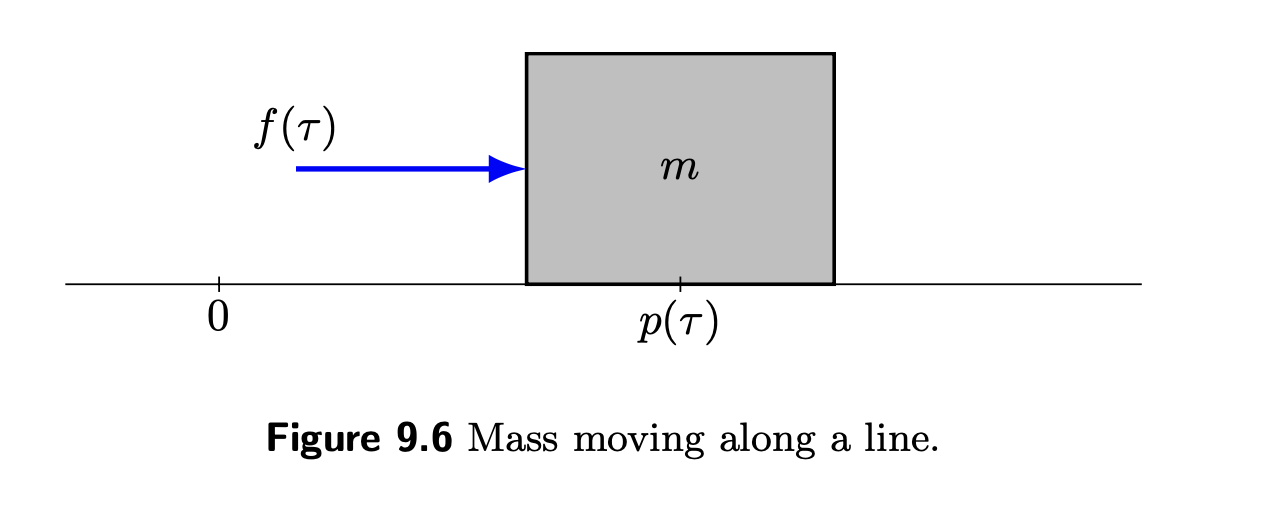

$p(\tau)$ is the (scalar) position of the mass at time $\tau$. 
position satisfies Newton's lae of motion, differential equation 

\begin{align}
m\frac{d^2p}{d\tau^2}(\tau) &= -\eta\frac{dp}{dt}(\tau) + f(\tau)
\end{align}
- (m*a) = F (sum of the drag and external forces)
- $m > 0$ : mass
- $f(\tau)$ : external force acting on the mass at time $\tau$
- $\eta > 0$: drag coefficient

Introducing velocity, $v(\tau) = \frac{dp}{d\tau}(\tau)$, write diff eq as 
\begin{align}
m\frac{dv}{d\tau}(\tau) &= -\eta v(\tau) + f(\tau)
\end{align}


**Discretization** for creating approximate linear dynamical system model from diff eq, discretize time. 
- Let $h > 0$ be the sampling interval of time (small)

We define: 
- $p_k = p(kh)$
- $v_k = v(kh)$
- $f_k = f(kh)$

Define approximations: 
\begin{align}
\frac{dp}{d\tau}(kh) &\approx \frac{p_{k+1}-p_k}{h} \\
\frac{dv}{d\tau}(kh) &\approx \frac{v_{k+1}-v_k}{h} \\
\end{align}

Replacing our differential equations and definition of velocity, we get: 
\begin{align}
v_k &\approx \frac{p_{k+1}-p_k}{h} \\
m\frac{v_{k+1}-v_k}{h}&= -\eta v_k + f_k\ \\
\end{align}

**Linear Dynamical System** : $x_k = (p_k, v_k)$
\begin{align}
x_{k+1} = \begin{bmatrix}
            1 & h \\
            0 & 1-h\eta/m
           \end{bmatrix}
        x_k +  \begin{bmatrix}
             0 \\ h/m
           \end{bmatrix} f_k, \space\space\space k = 1,2,\dots,
\end{align}

With input $f_k$, we get dynamics and input matrices:
\begin{align}
A = \begin{bmatrix}
            1 & h \\
            0 & 1-h\eta/m
           \end{bmatrix},  \space\space\space
      B = \begin{bmatrix}
             0 \\ h/m
           \end{bmatrix}
\end{align}

The approximation we have in our linear dynamical systme turns a set of ddifferential euqations into a recursion that approximates it, is called the *Euler method*. 


**Example**
- $m=1kg$
- $\eta=1\frac{Nm}{s}$
- $h=0.01s$
- $f(\tau) = \begin{cases} \mathbin{\phantom{-}}0.0 & 0.0 \leq \tau < 0.5 \\ \mathbin{\phantom{-}}1.0 & 0.5 \leq \tau < 1.0 \\ -1.3 & 1.0 \leq \tau < 1.4 \\ \mathbin{\phantom{-}}0.0 & 1.4 \leq \tau  \end{cases}$

Simulate this system for a period of 6 seconds. Initial state $x_1 = (0,0)$, $k=1,\dots,600$

In [59]:
# linear dynamical system setup
h=0.01; m=1; eta=1;

A = [1 h;
     0 1-h*eta/m];
B = [0; h/m];
x1 = [0, 0];

K = 600
f = zeros(K); f[50:99] .= 1.0; f[100:139] .= -1.3;

In [60]:
# dynamic system recursion
X = [x1 zeros(length(x1),K-1)];
for k=1:K-1
    X[:,k+1] = A*X[:,k] + B*f[k]
end

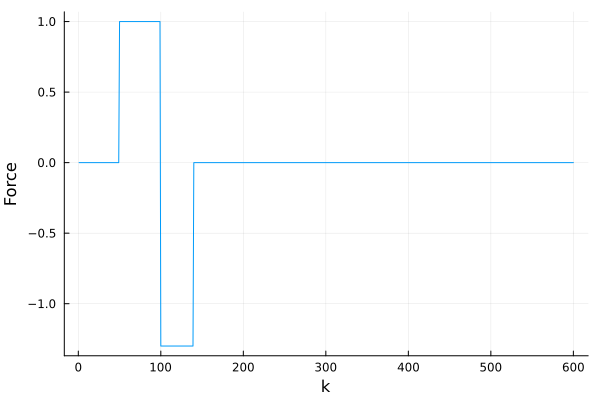

In [64]:
using Plots
plot(f, xlabel="k", ylabel="Force", legend=false )

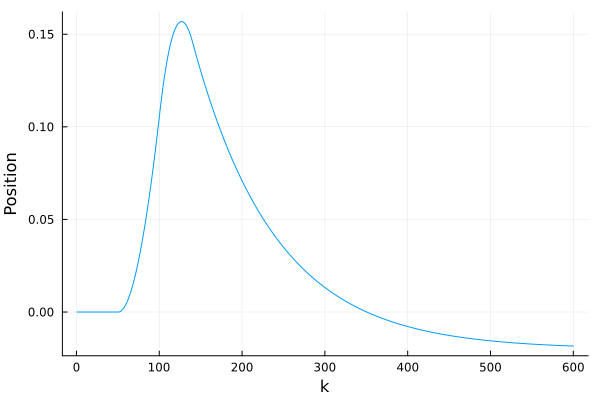

In [65]:
plot(X[1,:], xlabel="k", ylabel="Position", legend=false )

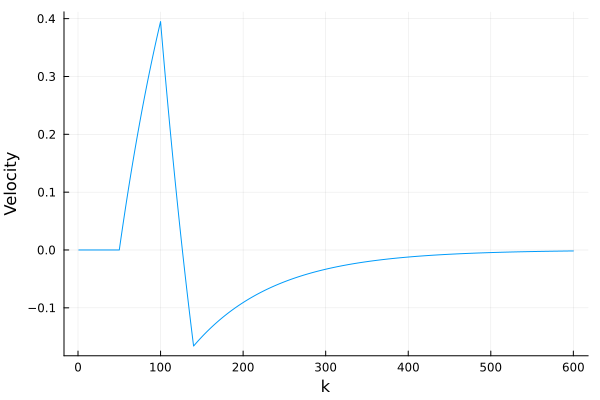

In [67]:
plot(X[2,:], xlabel="k", ylabel="Velocity", legend=false )